In [13]:
!pip install "git+https://github.com/facebookresearch/detectron2.git"

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-fges8x7m
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-fges8x7m
  Created wheel for detectron2: filename=detectron2-0.4-cp37-cp37m-linux_x86_64.whl size=5391605 sha256=0ab096d1aafba1eb3901366df663b20397815eb86728095e7e605f9d5be66543
  Stored in directory: /tmp/pip-ephem-wheel-cache-lw4wmizz/wheels/33/ac/bb/5ef90585c21c67e2f0b6aae55ec6b43017ad57af33d5f4c339
Successfully built detectron2


In [14]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog
from detectron2.data.datasets import register_coco_instances

In [ ]:
register_coco_instances("my_activity_train", {}, "/content/train/_annotations.coco.json", "/content/train")
register_coco_instances("my_activity_val", {}, "/content/valid/_annotations.coco.json", "/content/valid")
register_coco_instances("my_activity_test", {}, "/content/test/_annotations.coco.json", "/content/test")

In [5]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_activity_train",)
cfg.DATASETS.TEST = ("my_activity_val",)
cfg.DATALOADER.NUM_WORKERS = 2 # any higher can cause crashing
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER = 1000
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4
cfg.TEST.EVAL_PERIOD = 300

In [6]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator
import os

In [7]:
class CocoTrainer(DefaultTrainer):
  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):
    if output_folder is None:
      os.makedirs("coco_eval", exist_ok=True)
      output_folder = "coco_eval"
    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [8]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[05/04 22:23:19 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_68b088.pkl: 421MB [00:18, 22.3MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (5, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (5,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (16, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (16,) in the model! You might want to double check if this is expected.


[05/04 22:23:40 d2.engine.train_loop]: Starting training from iteration 0
[05/04 22:24:17 d2.utils.events]:  eta: 0:31:42  iter: 19  total_loss: 2.25  loss_cls: 1.544  loss_box_reg: 0.6997  loss_rpn_cls: 0.01382  loss_rpn_loc: 0.003122  time: 1.8204  data_time: 0.0262  lr: 1.9981e-05  max_mem: 7202M
[05/04 22:24:54 d2.utils.events]:  eta: 0:30:21  iter: 39  total_loss: 1.983  loss_cls: 1.278  loss_box_reg: 0.6993  loss_rpn_cls: 0.01811  loss_rpn_loc: 0.003137  time: 1.8586  data_time: 0.0162  lr: 3.9961e-05  max_mem: 7202M
[05/04 22:25:38 d2.utils.events]:  eta: 0:31:01  iter: 59  total_loss: 1.628  loss_cls: 0.8742  loss_box_reg: 0.7105  loss_rpn_cls: 0.01152  loss_rpn_loc: 0.003786  time: 1.9662  data_time: 0.0165  lr: 5.9941e-05  max_mem: 7202M
[05/04 22:26:19 d2.utils.events]:  eta: 0:30:34  iter: 79  total_loss: 1.304  loss_cls: 0.589  loss_box_reg: 0.7141  loss_rpn_cls: 0.009173  loss_rpn_loc: 0.003348  time: 1.9865  data_time: 0.0193  lr: 7.9921e-05  max_mem: 7202M
[05/04 22:27:

In [9]:
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.engine import DefaultPredictor

In [10]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = .55
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("my_activity_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "my_activity_test")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [05/04 23:15:27 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [05/04 23:15:27 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/04 23:15:27 d2.data.datasets.coco]: Loaded 28 images in COCO format from /content/test/_annotations.coco.json
[05/04 23:15:27 d2.data.build]: Distribution of instances among all 4 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
| Activities | 0            |  running   | 33           |  standing  | 31           |
|  walking   | 15           |            |              |            |              |
|   total    | 79           |            |              |            |              |
[05/04 23:15:27 d2.data.dataset_mapper]: [DatasetMapper] Augmentat

OrderedDict([('bbox',
              {'AP': 60.87191241432903,
               'AP-Activities': nan,
               'AP-running': 73.19490976110798,
               'AP-standing': 59.357895749636235,
               'AP-walking': 50.0629317322429,
               'AP50': 74.46666773729086,
               'AP75': 71.42602876936273,
               'APl': 68.53854791204974,
               'APm': 57.81712611221317,
               'APs': 60.0})])

In [20]:
from detectron2.utils.visualizer import ColorMode
from detectron2.utils.visualizer import Visualizer
import glob
import time

Total runtime is 5.7211 seconds


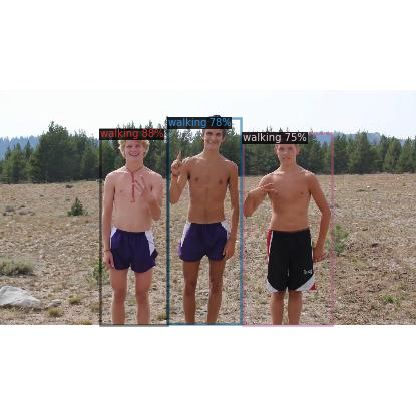

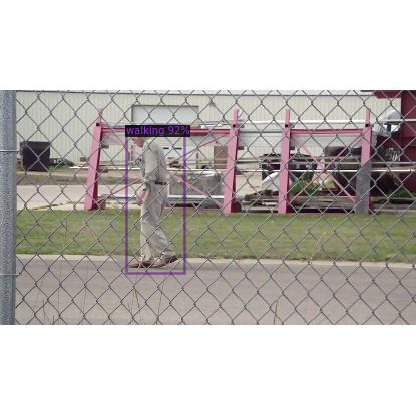

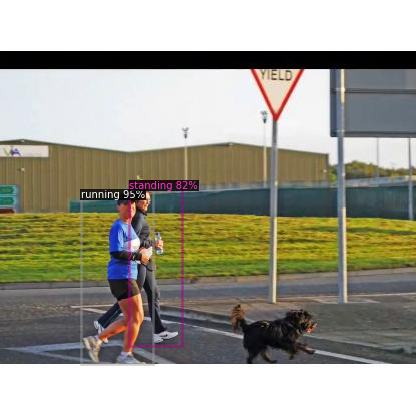

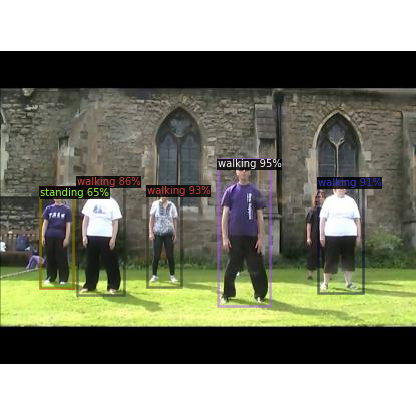

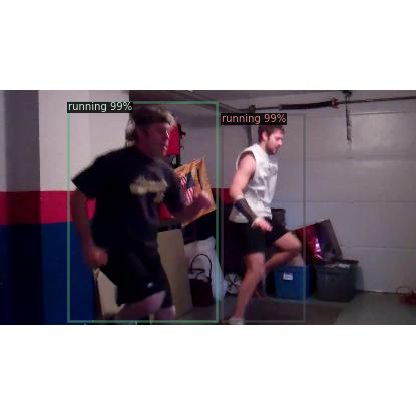

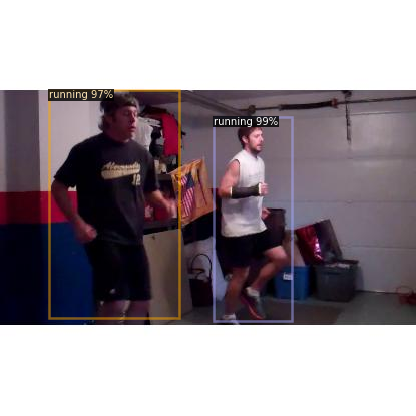

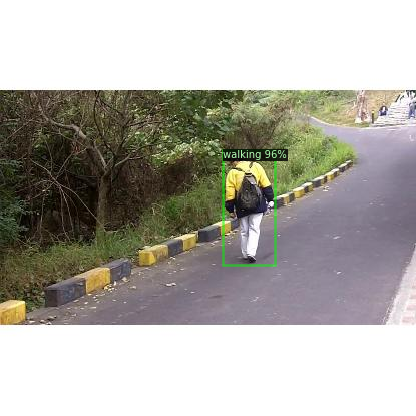

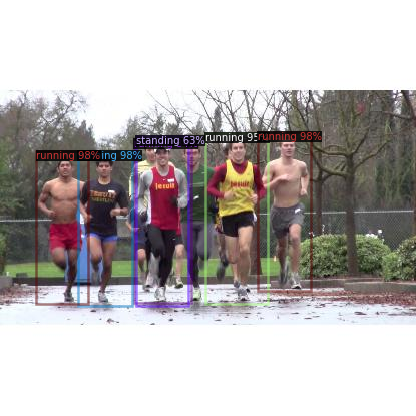

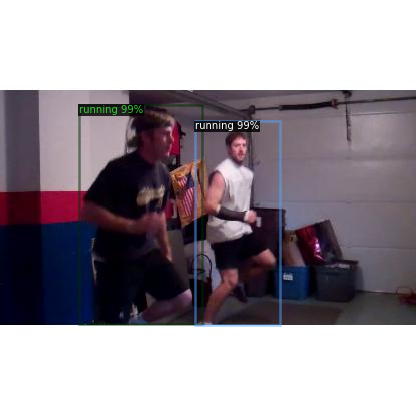

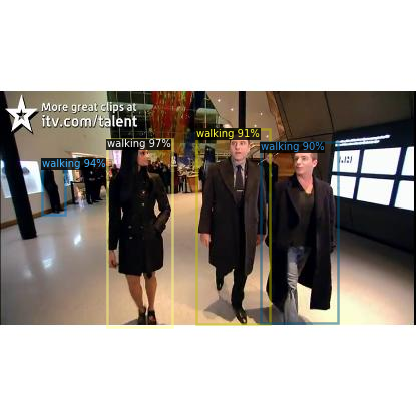

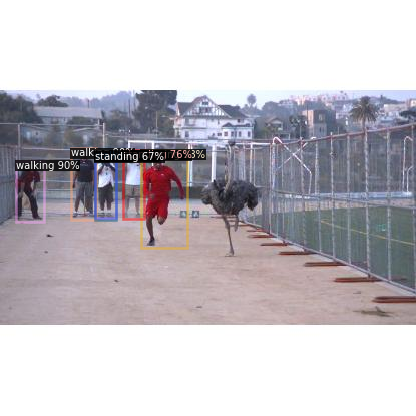

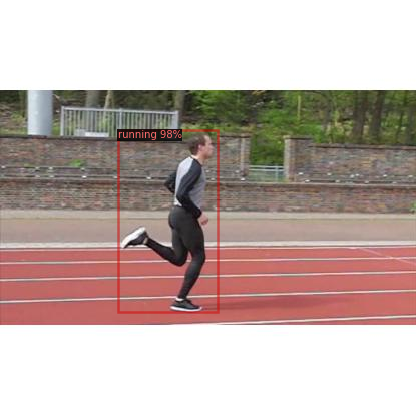

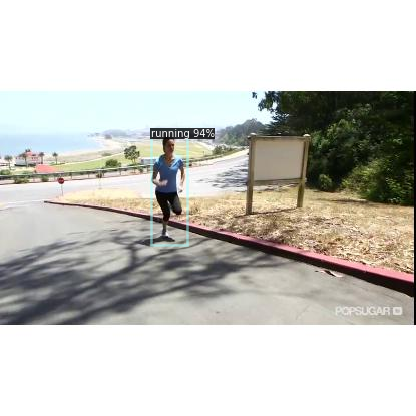

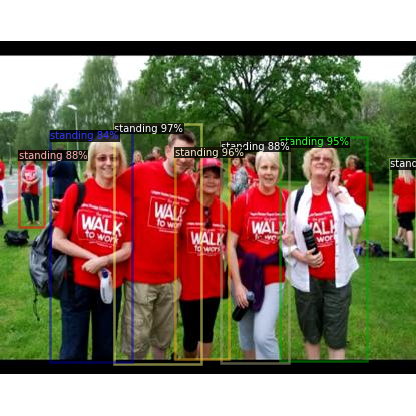

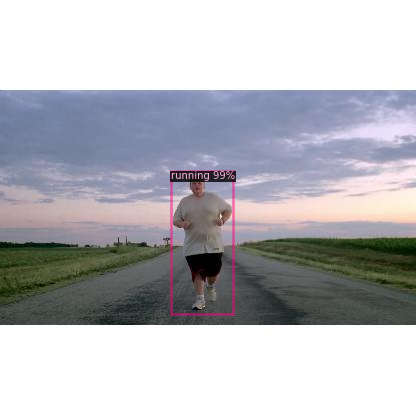

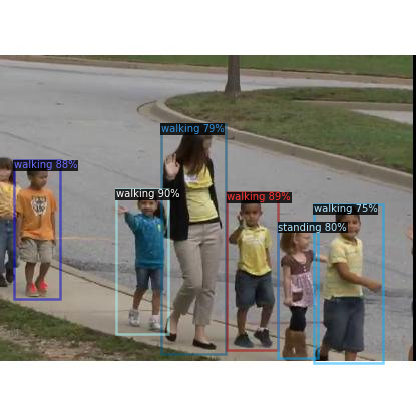

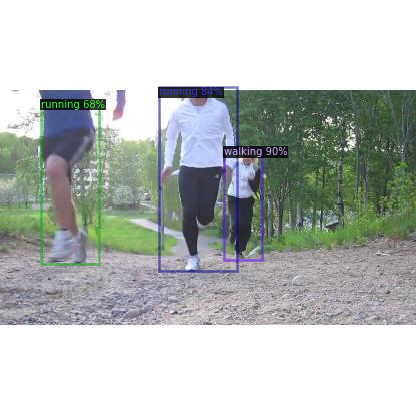

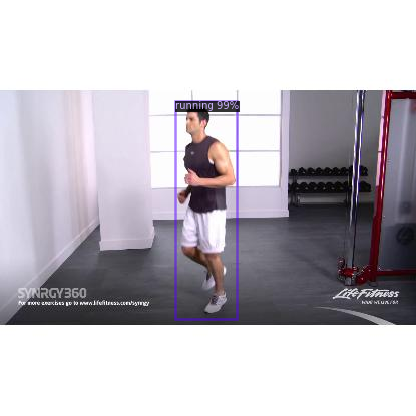

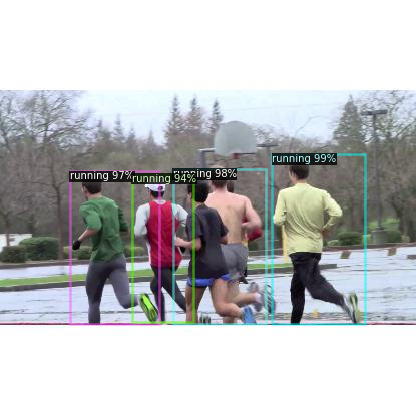

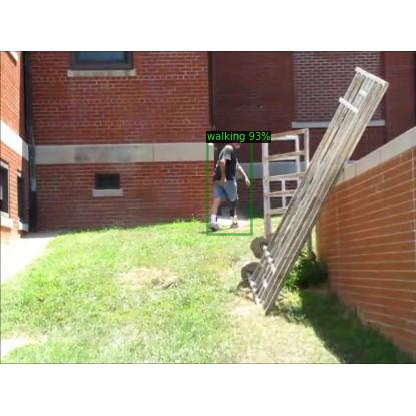

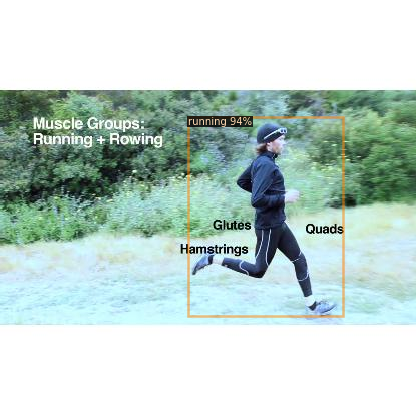

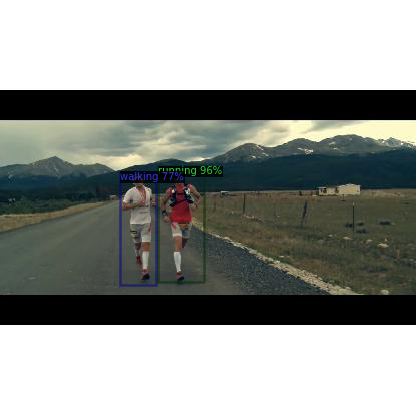

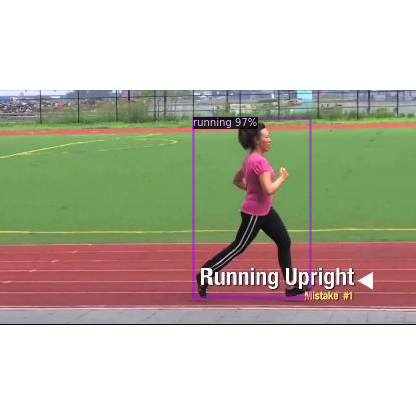

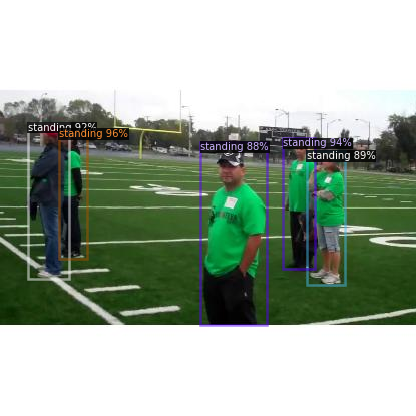

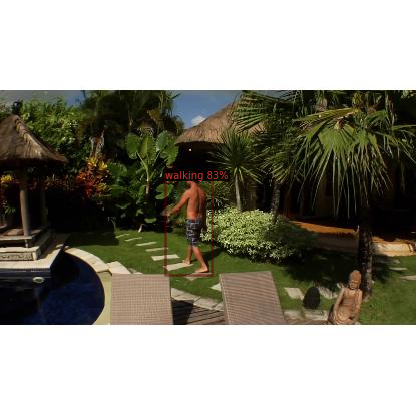

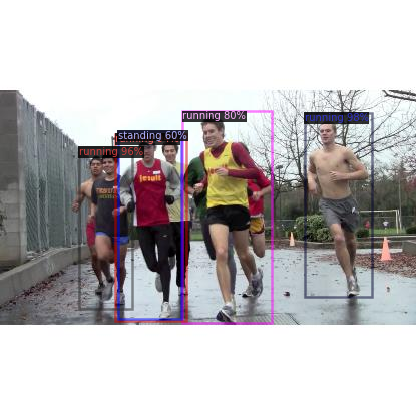

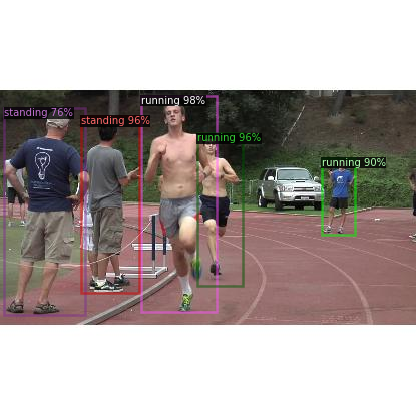

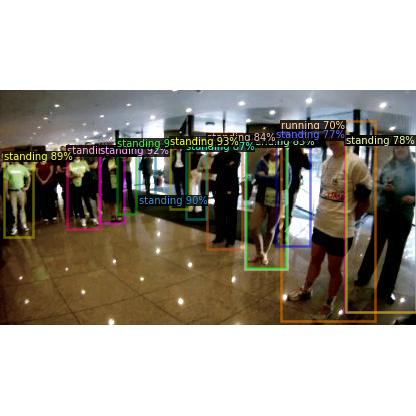

In [26]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.DATASETS.TEST = ("my_activity_test", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.50
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("my_activity_test")

start = time.time()
for imageName in glob.glob('/content/test/*jpg'):
  im = cv2.imread(imageName)
  outputs = predictor(im)
end = time.time()
diff = end - start
print("Total runtime is {:.4f} seconds".format(diff))
for imageName in glob.glob('/content/test/*jpg'):
  im = cv2.imread(imageName)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                scale=1,
                metadata=test_metadata 
  )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])